# Information Retrieval

Bag of Words and TF-IDF

## Library Imports

In [3]:
# Import Os to get to the root directory
import os
import sys


# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

# Import own functions
from libraries import corpus
from libraries import pdf2text

import warnings
warnings.filterwarnings("ignore")

# Import packages

import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
import string # for punctuation
import gc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Preprocessing

In [4]:
from importlib import reload
reload(corpus)

<module 'libraries.corpus' from 'C:\\Users\\laman\\Desktop\\datascience_project-master\\libraries\\corpus.py'>

In [5]:
dataset = pdf2text.get_dataset()

2019-06-04 22:50:57,854 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [6]:
dataset.keys()

dict_keys(['0chain', '1World', '1x2Coin', 'AB-CHAIN', 'ABCC', 'ABLE', 'Absolute', 'ACE', 'Achain', 'AcreCoin', 'Actinium', 'AcuteAngle', 'Adamant', 'AdBank', 'AdChainRegistry', 'AdCoin', 'Adhive', 'Aditus', 'Adshares', 'Ample!', 'BasicAttentionToken', 'Binance', 'bitcoin', 'BitcoinGold', 'Cosmos', 'CryptoNote', 'DaiStableCoinSystem', 'dash', 'EtherAce', 'ethereum', 'EthereumClassic', 'Giant', 'GiveCoin', 'GuaranteedEntranceToken', 'IOTA', 'KwattCoin', 'oxcert', 'RippleProtocol', 'StellarConcensusProtocol', 'Tether', 'Tezos', 'Tron', 'Vechain', 'Zerocash'])

In [7]:
len(dataset.keys())

44

In [8]:
dataset['0chain']

"\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n0chain Whitepaper V2.0 (PDF)\n\n\n 1\n\n0C̷hain: A Fast, Secure, Scalable, \n& Free Blockchain\nTailored For High-Performance, Zero-Trust, Decentralized Storage\n\nWhitepaper V2.0 Last Updated Mar. 20, 2019 Subject To Further Review & Update\n\nSaswata Basu, Thomas Austin, Siva Dirisala, & 0̷Chain Team\n\n\n\n 2\n\nTable Of Contents \n\nIntroduction\n\nMOTIVATION\n\nEXECUTIVE SUMMARY\n\n1. AN INTRODUCTION TO 0̷CHAIN\n\n2. PRODUCTS\n\n2.1 0̷CHAINNET \n\n2.2 0̷BOX \n\n2.3 0̷WALLET \n\n3. 0̷CHAIN ARCHITECTURE\n\n3.1 CONSENSUS PROTOCOL\n\n    3.2 STORAGE PROTOCOL \n\n    3.3 SPLIT KEY PROTOCOL \n\n    3.4 TOKEN REWARD PROTOCOL \n\n    3.5 GOVERNANCE PROTOCOL \n\n    3.6 OTHER PROTOCOLS \n\n4. APPENDICES\n\nAPPENDIX 1: TEAM\nAPPENDIX 2: UNDERSTANDING 0̷CHAIN FINALITY \n\nAPPENDIX 3: CONSENSUS PROTOCOL  \nAPPENDIX 4: STORAGE & TOKEN REWARD PROTOCOL \nAPPENDIX 5: SPLIT KEY PROTOCOL\n\n3\n4\n9\n13\n\n23\n24\n25\n26\n26\

In [9]:
corpora = corpus.makeCleanCorpus(dataset, lemmatize=False, removePunct=True, removeNums=True,makeSentences=True, removeURL=True)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Cleaning: 0chain
Cleaning: 1World
Cleaning: 1x2Coin
Cleaning: AB-CHAIN
Cleaning: ABCC
Cleaning: ABLE
Cleaning: Absolute
Cleaning: ACE
Cleaning: Achain
Cleaning: AcreCoin
Cleaning: Actinium
Cleaning: AcuteAngle
Cleaning: Adamant
Cleaning: AdBank
Cleaning: AdChainRegistry
Cleaning: AdCoin
Cleaning: Adhive
Cleaning: Aditus
Cleaning: Adshares
Cleaning: Ample!
Cleaning: BasicAttentionToken
Cleaning: Binance
Cleaning: bitcoin
Cleaning: BitcoinGold
Cleaning: Cosmos
Cleaning: CryptoNote
Cleaning: DaiStableCoinSystem
Cleaning: dash
Cleaning: EtherAce
Cleaning: ethereum
Cleaning: EthereumClassic
Cleaning: Giant
Cleaning: GiveCoin
Cleaning: GuaranteedEntranceToken
Cleaning: IOTA
Cleaning: KwattCoin
Cleaning: oxcert
Cleaning: RippleProtocol
Cleaning: StellarConcensusProtocol
Cleaning: Tether
Cleaning: Tezos
Cleaning: Tron
Cleaning: Vechain
Cleaning: Zerocash
Done!


In [33]:
corpora.keys()

dict_keys(['0chain', '1World', '1x2Coin', 'AB-CHAIN', 'ABCC', 'ABLE', 'Absolute', 'ACE', 'Achain', 'AcreCoin', 'Actinium', 'AcuteAngle', 'Adamant', 'AdBank', 'AdChainRegistry', 'AdCoin', 'Adhive', 'Aditus', 'Adshares', 'Ample!', 'BasicAttentionToken', 'Binance', 'bitcoin', 'BitcoinGold', 'Cosmos', 'CryptoNote', 'DaiStableCoinSystem', 'dash', 'EtherAce', 'ethereum', 'EthereumClassic', 'Giant', 'GiveCoin', 'GuaranteedEntranceToken', 'IOTA', 'KwattCoin', 'oxcert', 'RippleProtocol', 'StellarConcensusProtocol', 'Tether', 'Tezos', 'Tron', 'Vechain', 'Zerocash'])

BAG OF WORDS

A popular and simple method of feature extraction with text data is called the bag-of-words model of text.

# 0chain

In [11]:
corpora["0chain"]

['chain whitepaper v pdf c̷hain fast secure scalable free blockchain tailored highperformance zerotrust decentralized storage whitepaper v updated mar',
 'subject review update saswata basu thomas austin siva dirisala ̷chain team table contents introduction motivation executive summary ',
 'introduction ̷chain ',
 'products ',
 '̷chainnet ',
 '̷box ',
 '̷wallet ',
 '̷chain architecture ',
 'consensus protocol ',
 'storage protocol ',
 'split key protocol ',
 'token reward protocol ',
 'governance protocol ',
 'protocols ',
 'appendices appendix team appendix understanding ̷chain finality appendix consensus protocol appendix storage token reward protocol appendix split key protocol motivation started developing ̷chain july driven idea redefining cloud context privacy transparency user control data',
 'dove deeper development process identified number critical unresolved issues cryptocurrency space token security token valuation metrics governance token inflation',
 'address aforemention

In [15]:
tokenizer = nltk.tokenize.RegexpTokenizer('\s+', gaps=True)
tokens = [tokenizer.tokenize(s) for s in corpora["0chain"]] # It takes some time; inbuilt tokenizer cannot detect shortform like don't, I've etc
print('We have', np.reshape(np.concatenate(tokens), -1).shape[0], 'words in total. \n') # DON'T do len(sum(tokens,[])) because of speed

print(tokens[10:20])

We have 3791 words in total. 

[['split', 'key', 'protocol'], ['token', 'reward', 'protocol'], ['governance', 'protocol'], ['protocols'], ['appendices', 'appendix', 'team', 'appendix', 'understanding', '̷chain', 'finality', 'appendix', 'consensus', 'protocol', 'appendix', 'storage', 'token', 'reward', 'protocol', 'appendix', 'split', 'key', 'protocol', 'motivation', 'started', 'developing', '̷chain', 'july', 'driven', 'idea', 'redefining', 'cloud', 'context', 'privacy', 'transparency', 'user', 'control', 'data'], ['dove', 'deeper', 'development', 'process', 'identified', 'number', 'critical', 'unresolved', 'issues', 'cryptocurrency', 'space', 'token', 'security', 'token', 'valuation', 'metrics', 'governance', 'token', 'inflation'], ['address', 'aforementioned', 'issues', 'chose', 'conduct', 'additional', 'research', 'development'], ['today', 'redefining', 'cloud', 'blockchain', 'cryptocurrency', 'landscape', 'novel', 'protocols'], ['whitepaper', 'executive', 'summary', 'executive', 'su

In [13]:
from nltk.probability import FreqDist

# Turn corpus into np before unnest the list
tokens = np.array([np.array(s) for s in tokens]) # numpy can handle text as well
# DON'T DO THIS! (Too slow) # fdist = FreqDist(sum(tokens,[])) # sum(tokens,[]) --> unnest tokens

fdist = FreqDist(np.concatenate(tokens))

fdist.most_common(5)

[('finality', 62),
 ('block', 55),
 ('̷chain', 49),
 ('protocol', 43),
 ('wait', 37)]

In [17]:
#Stopwords

from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
print(stop_words)

{'this', 'further', 'and', 'up', 'will', 've', 'between', 'them', 'its', 'm', 'don', "shan't", 'my', 'are', 'being', 'our', 'she', 'me', "you'd", 'most', 'only', 't', 'can', 'why', "shouldn't", "won't", 'mightn', 'ourselves', 'shan', "didn't", 'which', 'weren', 'off', 'aren', 'doing', 'during', 'very', 'with', 'her', 'have', 'each', 'about', 'of', 'nor', "needn't", 'in', 'down', 'or', 'am', 'more', "doesn't", 'shouldn', 'be', 'were', 'couldn', 'other', 'ain', 'hasn', 'didn', 'wouldn', 'did', 'while', 'they', 'such', "hasn't", 'their', 'against', 'o', 'hadn', 'himself', 'above', 'so', 'then', 'no', 'at', 'he', 'whom', 'it', 'do', 'by', 'out', 'how', 'where', 'some', "wasn't", "aren't", 'below', 'does', 'should', 'an', 'won', 'him', 'has', 'you', 'as', "you'll", 'same', 'those', 'not', 'a', 'before', 'ours', 'into', 'under', 'been', 'now', 'just', 'few', "weren't", 'to', 'all', 'isn', 'myself', "should've", "don't", 'd', 'is', 'again', 'herself', 'over', 'hers', 'after', 'on', "that'll",

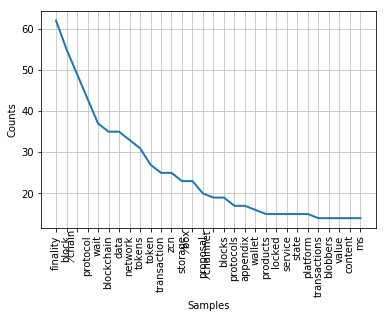

In [20]:
import matplotlib.pyplot as plt

tokens = [[w for w in s if w not in stop_words] for s in tokens]
tokens = np.array([np.array(s) for s in tokens])
fdist = FreqDist(np.concatenate(tokens))
fdist.plot(30, cumulative=False)
plt.show()

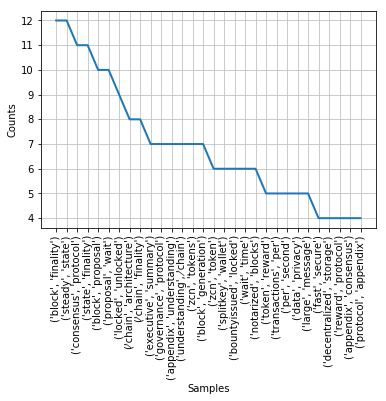

In [21]:
from nltk import bigrams, ngrams
bigrams_tokens = bigrams(np.concatenate(tokens))
fdist_bigrams = FreqDist(list(bigrams_tokens))
fdist_bigrams.plot(30,cumulative=False)
plt.show()

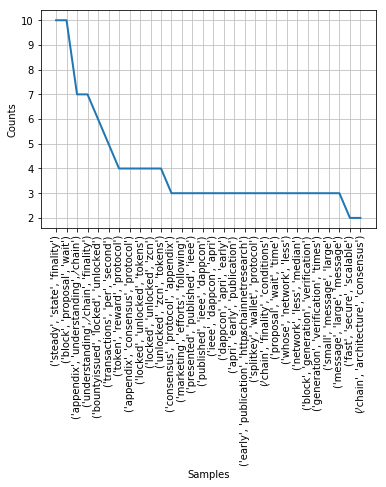

In [22]:
# n=3
trigrams_tokens = ngrams(np.concatenate(tokens), 3)
fdist_trigrams = FreqDist(list(trigrams_tokens))
fdist_trigrams.plot(30,cumulative=False)
plt.show()

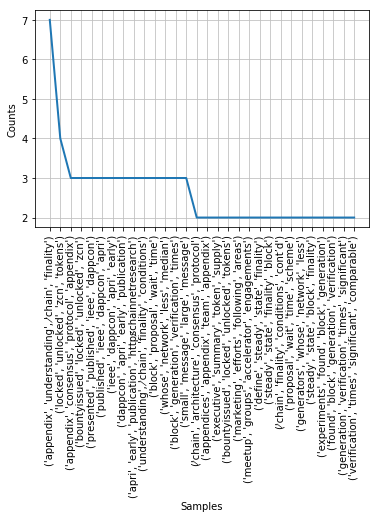

In [23]:
# n=4
grams4_tokens = ngrams(np.concatenate(tokens), 4)
fdist_grams4 = FreqDist(list(grams4_tokens))
fdist_grams4.plot(30,cumulative=False)
plt.show()

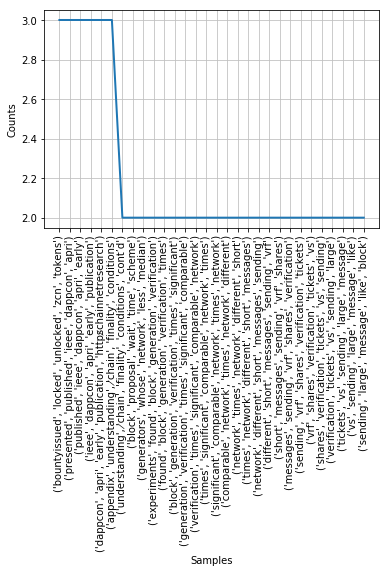

In [24]:
# n=5
grams5_tokens = ngrams(np.concatenate(tokens), 5)
fdist_grams5 = FreqDist(list(grams5_tokens))
fdist_grams5.plot(30,cumulative=False)
plt.show()

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [26]:
# use TreeankWordTokenizer
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
vect.set_params(tokenizer=tokenizer.tokenize)

# remove English stop words
vect.set_params(stop_words='english')

# include 1-grams and 2-grams
vect.set_params(ngram_range=(1, 2))

# ignore terms that appear in more than 50% of the documents
vect.set_params(max_df=0.5)

# only keep terms that appear in at least 2 documents
vect.set_params(min_df=2)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=2,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TreebankWordTokenizer.tokenize of <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x000002ABEADCEA90>>,
        vocabulary=None)

In [28]:
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(tokens)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

# see final the clean data
#print (train_data_features.shape)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'

In [46]:
# Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

# Transforms the data into a bag of words
count_train = count_vec.fit(corpora["0chain"])
bag_of_words = count_vec.transform(corpora["0chain"])

# Print the first 10 features of the count_vec
print("Every feature:\n{}".format(count_vec.get_feature_names()))
print("\nEvery 3rd feature:\n{}".format(count_vec.get_feature_names()[::3]))

Every feature:
['ability', 'able', 'absorbed', 'abstract', 'abstracted', 'accelerator', 'accepted', 'access', 'accommodate', 'accomplish', 'accomplished', 'accordingly', 'account', 'accountability', 'accumulated', 'accurate', 'achieve', 'achieved', 'acquisition', 'act', 'activated', 'actors', 'ad', 'addition', 'additional', 'additionally', 'additionremoval', 'address', 'addresses', 'addressing', 'adequately', 'administration', 'adoption', 'ads', 'advanced', 'advantages', 'advisors', 'aforementioned', 'agreed', 'agrees', 'aim', 'aims', 'algorithmic', 'alienate', 'allet', 'allocate', 'allocated', 'allocation', 'allow', 'allows', 'amiss', 'anonymous', 'api', 'app', 'appendices', 'appendix', 'apple', 'application', 'applications', 'approach', 'apri', 'arbitrarily', 'architect', 'architecture', 'areas', 'argued', 'arrive', 'art', 'article', 'artist', 'artists', 'aspect', 'assetbacked', 'assetbased', 'assets', 'assigns', 'associate', 'associated', 'assumed', 'assumes', 'assumptions', 'assure

In [39]:
#Vocabulary and vocabulary ID

print("Vocabulary size: {}".format(len(count_train.vocabulary_)))
print("Vocabulary content:\n {}".format(count_train.vocabulary_))

Vocabulary size: 1357
Vocabulary content:
 {'chain': 170, 'whitepaper': 1334, 'pdf': 834, 'hain': 523, 'fast': 456, 'secure': 1046, 'scalable': 1032, 'free': 492, 'blockchain': 118, 'tailored': 1181, 'highperformance': 540, 'zerotrust': 1355, 'decentralized': 306, 'storage': 1149, 'updated': 1272, 'mar': 694, 'subject': 1160, 'review': 998, 'update': 1271, 'saswata': 1030, 'basu': 107, 'thomas': 1201, 'austin': 86, 'siva': 1098, 'dirisala': 347, 'team': 1188, 'table': 1179, 'contents': 255, 'introduction': 616, 'motivation': 744, 'executive': 427, 'summary': 1170, 'products': 887, 'chainnet': 171, 'box': 133, 'wallet': 1325, 'architecture': 63, 'consensus': 247, 'protocol': 904, 'split': 1122, 'key': 633, 'token': 1215, 'reward': 999, 'governance': 514, 'protocols': 905, 'appendices': 54, 'appendix': 55, 'understanding': 1251, 'finality': 468, 'started': 1136, 'developing': 335, 'july': 632, 'driven': 367, 'idea': 552, 'redefining': 949, 'cloud': 201, 'context': 258, 'privacy': 875, 't

In [47]:
import collections, re
text_1 = corpora["0chain"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in text_1]
bagsofwords[0]

Counter({'chain': 1,
         'whitepaper': 2,
         'v': 2,
         'pdf': 1,
         'c': 1,
         'hain': 1,
         'fast': 1,
         'secure': 1,
         'scalable': 1,
         'free': 1,
         'blockchain': 1,
         'tailored': 1,
         'highperformance': 1,
         'zerotrust': 1,
         'decentralized': 1,
         'storage': 1,
         'updated': 1,
         'mar': 1})

In [43]:
bagsofwords[1]

Counter({'subject': 1,
         'review': 1,
         'update': 1,
         'saswata': 1,
         'basu': 1,
         'thomas': 1,
         'austin': 1,
         'siva': 1,
         'dirisala': 1,
         'chain': 1,
         'team': 1,
         'table': 1,
         'contents': 1,
         'introduction': 1,
         'motivation': 1,
         'executive': 1,
         'summary': 1})

In [44]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'finality': 62, 'chain': 58, 'block': 55, 'protocol': 43, 'wait': 37, 'blockchain': 35, 'data': 35, 'network': 33, 'tokens': 31, 'box': 27, 'token': 27, 'transaction': 25, 'zcn': 25, 'storage': 23, 's': 23, 'chainnet': 20, 'wallet': 20, 'proposal': 20, 'blocks': 19, 'protocols': 17, 'appendix': 17, 'products': 15, 'locked': 15, 'service': 15, 'state': 15, 'platform': 15, 'content': 15, 'transactions': 14, 'blobbers': 14, 'value': 14, 'ms': 14, 'market': 13, 'use': 13, 'based': 13, 'time': 13, 'architecture': 12, 'consensus': 12, 'governance': 12, 'user': 12, 'client': 12, 'services': 12, 'round': 12, 'blobber': 12, 'steady': 12, 'message': 12, 'secure': 11, 'team': 11, 'key': 11, 'process': 11, 'security': 11, 'per': 11, 'public': 11, 'miner': 11, 'following': 11, 'large': 11, 'tr': 11, 'issues': 10, 'today': 10, 'verification': 10, 'miners': 10, 'via': 10, 'used': 10, 'small': 10, 'infrastructure': 9, 'private': 9, 'also': 9, 'price': 9, 'rounds': 9, 'b': 9, 'need': 9, 'keys'

In [41]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
docs = np.array(corpora["0chain"])
bag = count.fit_transform(docs)
print(bag)

  (0, 721)	1
  (0, 1320)	1
  (0, 1192)	1
  (0, 316)	1
  (0, 1412)	1
  (0, 560)	1
  (0, 1225)	1
  (0, 127)	1
  (0, 510)	1
  (0, 1070)	1
  (0, 1084)	1
  (0, 472)	1
  (0, 542)	1
  (0, 870)	1
  (0, 1387)	2
  (0, 180)	1
  (1, 1213)	1
  (1, 443)	1
  (1, 771)	1
  (1, 638)	1
  (1, 265)	1
  (1, 1223)	1
  (1, 1232)	1
  (1, 357)	1
  (1, 1139)	1
  :	:
  (321, 744)	2
  (321, 1142)	1
  (321, 668)	1
  (321, 258)	1
  (321, 789)	1
  (322, 1102)	1
  (322, 455)	1
  (322, 1257)	1
  (322, 1283)	1
  (322, 745)	1
  (322, 586)	1
  (322, 1142)	1
  (322, 668)	1
  (322, 258)	1
  (322, 52)	1
  (322, 918)	1
  (322, 941)	1
  (322, 180)	1
  (323, 571)	1
  (323, 99)	1
  (323, 372)	1
  (323, 514)	1
  (323, 62)	3
  (323, 941)	3
  (323, 257)	3


## Visualization / Outcome

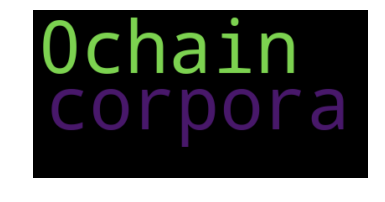

In [76]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(corpora["0chain"]) # THE PROBLEM IS HERE
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

TypeError: cannot use a string pattern on a bytes-like object

In [88]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(tokens) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show()

TypeError: 'WordListCorpusReader' object is not iterable

In [90]:
text_1 = corpora["0chain"]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(bag_of_words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

TypeError: expected string or bytes-like object

TFI-IDF

In [ ]:
from collections import Counter, defaultdict
import pandas as pd
import pandas as pd
temp = []
for h, c in corpora.items():
    temp.append(pd.DataFrame.from_dict(Counter(c), orient='index'))
#     pd.DataFrame.from_dict(Counter(corpus['HP1']), orient='index')

term_count = pd.concat(temp, axis=1)
term_count.reset_index(inplace=True)
term_count.columns = ["token",'0chain', '1World', '1x2Coin', 'AB-CHAIN', 'ABCC', 'ABLE', 'Absolute', 'ACE', 'Achain', 'AcreCoin', 'Actinium', 'AcuteAngle', 'Adamant', 'AdBank', 'AdChainRegistry', 'AdCoin', 'Adhive', 'Aditus', 'Adshares', 'Ample!', 'BasicAttentionToken', 'Binance', 'bitcoin', 'BitcoinGold', 'Cosmos', 'CryptoNote', 'DaiStableCoinSystem', 'dash', 'EtherAce', 'ethereum', 'EthereumClassic', 'Giant', 'GiveCoin', 'GuaranteedEntranceToken', 'IOTA', 'KwattCoin', 'oxcert', 'RippleProtocol', 'StellarConcensusProtocol', 'Tether', 'Tezos', 'Tron', 'Vechain', 'Zerocash']
term_count['sum'] = term_count.sum(axis = 1, skipna = True) 
term_count.fillna(0, inplace=True)
term_count.sort_values('sum', ascending=False, inplace=False).head(20)

In [ ]:
TF = term_count.iloc[:,2:9]/(term_count.iloc[:,2:9].sum(axis=0))

In [ ]:
IDF = np.log(7/((term_count.iloc[:,2:9]/term_count.iloc[:,2:9]).sum(axis=1)))

In [ ]:
TFIDF = TF.apply(lambda col: col*IDF)
TFIDF = pd.concat([term_count.iloc[:,:2],TFIDF], axis=1)
TFIDF['sum'] = TFIDF.sum(axis=1)

In [ ]:
TFIDF.sort_values('sum', ascending=False).head(10)

In [ ]:
toPlot = TFIDF.sort_values('sum', ascending=False).head(10)
statistic = toPlot.iloc[:,2:9]
statistic.set_index(toPlot['token1'] + ' ' + toPlot['token2'], inplace=True)

toPlot = statistic.T
plt.figure(figsize=(18,6))
for c in toPlot:
    plt.plot(toPlot[c], label=toPlot[c].name)
plt.legend()
plt.show()

## Method Application